**Importing the dependencies:**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Pre-Processing:

In [16]:
# loading the gold data into pandas dataframe

gold_df = pd.read_csv('/content/gld_price_data.csv')

In [17]:
# printing the first five rows of the data

gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
# printing the last five rows of the dataframe

gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [19]:
# checking the number of rows and columns

gold_df.shape


(2290, 6)

In [20]:
# getting more information about the data

gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


As we can see that there is no null values in the dataset by looking at the non null count column but this thing can also be checked using isnull function which is as follows.

Also, we can see the datatype which is there in our data set is numerical only, so we don't have to worry about this as well. As we will not need to do much processing before feeding the data to our machine learning model.

In [21]:
#checking for the missing values in our dataset

gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

So, again this can be verified that there is no null value in our dataset which is a plus point for us as we don't have to handle those missing values in such case:

Getting some more statistical measures about the data:

In [22]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Now we will go ahead and check for the correlation between the various features. This depicts how the various features are related with each other. 
There is two type of correlation:
1. Postitive
2. Negative 

Positive correlation basically shows that these values are directly proportioanl to each other that is if one value increases other value will also increase. 

Whereas negative correlation shows that there is inverse relation between them. That is if one value increases the other value might be decreasing. 

In [23]:
correlation = gold_df.corr()

Now we will draw the heatmap to basically understand how and what correlation is there in between the various features of our data. 


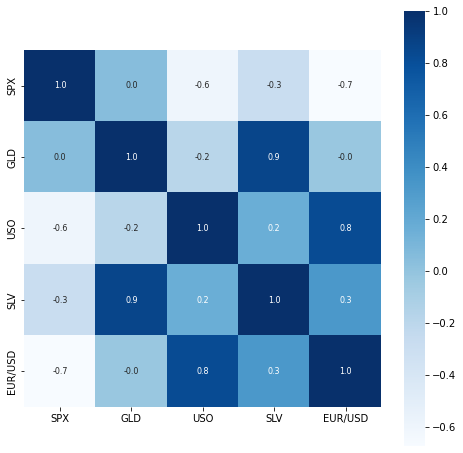

In [26]:
# constructing the heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap= 'Blues')

In [27]:
# printing the correlation values of Gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


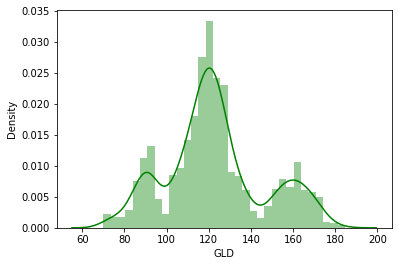

In [28]:
#checking the distribution of the gold price

sns.distplot(gold_df['GLD'], color='green')

Splitting the features and the Target variable:

In [29]:
X = gold_df.drop(['Date', 'GLD'], axis = 1)

In [30]:
Y = gold_df['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into training data and testing data:

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


**Model Training**

In [37]:
regressor = RandomForestRegressor(n_estimators= 100)

In [38]:
#training the model

regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [39]:
# prediction on test data

test_data_prediction = regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[164.37559991 127.51189904 124.15589937 119.52519903 126.04569872
  86.605898   171.91650229 137.70560037 106.86390069 133.27350195
 120.52599936 124.86560029 144.10949823 104.60529998  80.99789905
 119.40240002 140.14149981  90.32230054  91.50559928 128.37740211
 125.974899   147.89639968 116.54470144 152.9710988  129.50259914
 129.15300107 117.94530111 111.43640066 166.52660276 158.08539897
 125.99130182 153.9308015  127.05109956 122.5027976  116.53160141
 154.49019962 114.86010016 120.67900117 104.24760192 105.37780041
 134.68249961  85.73269935 154.73370104 121.32960013 122.3675004
 155.46160104 120.51390032 116.62939977 168.76660285 116.5172005
 137.56840153 161.70909878 158.32130049 153.0175015  123.98380027
 117.05610001 167.27569983 117.33209967 165.55870024  84.06329986
 121.37899921 122.21210014 120.11239988 171.99609959 118.81219996
 180.61509636 161.93180318 138.87520219 115.63980052  92.8102002
 171.96310008 117.7040999  117.86149883 125.5682999  147.15089887
  91.37330076

In [41]:
print(Y_test)

863     161.990005
1351    127.580002
2284    124.570000
533     118.970001
2247    125.720001
           ...    
745     147.830002
58       93.459999
2100    115.620003
283      88.800003
2060    120.839996
Name: GLD, Length: 458, dtype: float64


In [42]:
# R squared error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9853452165774083


Compare the actual value and the predicted value in the plot:

In [43]:
Y_test = list(Y_test)


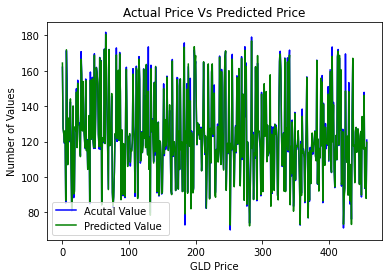

In [46]:
plt.plot(Y_test, color = 'blue', label = 'Acutal Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value ')
plt.title("Actual Price Vs Predicted Price")
plt.xlabel('GLD Price')
plt.ylabel('Number of Values')
plt.legend()
plt.show()

As we can see from the above graph that the actual values are a little more than the predicted values. 